## Finance Section

Which companies do we find relevant?
What categories can we put them under?

https://www.marketbeat.com/stocks/sectors/medical/
Health Insurance Companies
*   Anthem,ANTM
*   UnitedHealth Group,UNH
*   Cigna,CI
*   MetLife,MET
*   Aetna, AET

Pharmaceutical Companies
*   Novartis - keep
*   Pfizer - keep
*   Johnson & Johnson - keep
*   Roche -keep
*   Merck & Co. - keep 
*   Moderna - keep
*   BioNTech - perhaps keep
*   AbbVie








Which timeline?


Dec 2019 was the first case of Covid
We are about to hit 2023
So plus and minus 3 years
11/1/16-**11/1/19**-11/01/22

## Covid Section

New covid 19 data to play with
two data sets
https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-epidemiology.md
https://github.com/GoogleCloudPlatform/covid-19-open-data/blob/main/docs/table-vaccinations.md
each has their own nuance and sources

but they both utilitze date-region pair format for the relevant data




In [13]:
import os
import pandas as pd
import python.data_processing as dp
import python.data_viz as dv

In [2]:
in_path = "data/rawdata"
out_path = "data/processed"

### Stock Data Acquisition and API Interface

In [3]:
x = False
y = False

symbols = ['ANTM','UNH','CI','MET','AET']
allstock_df1 = dp.retrieve_stock_data(symbols, x, y)

symbols = ['NVS','PFE','JNJ','MRK']
allstock_df2 = dp.retrieve_stock_data(symbols, x, y)

symbols = ['MRNA','BNTX','ABBV']
allstock_df3 = dp.retrieve_stock_data(symbols, x, y)

allstock_df = pd.concat([allstock_df1, allstock_df2, allstock_df3], ignore_index=True)

In [4]:
allstock_df.to_csv('data/rawdata/fullstockdata.csv', index=False)  

### Stock Data from File

In [5]:
# read in stock data from file and clean
allstock_df = pd.read_csv('data/rawdata/fullstockdata.csv')
allstock_df = allstock_df[::-1]
newstock_df = dp.process_stock_data(allstock_df)
newstock_df.head()

key dataframe added


,ABBV open,AET open,ANTM open,BNTX open,CI open,JNJ open,MET open,MRK open,MRNA open,NVS open,PFE open,UNH open,dt,month
date,,,,,,,,,,,,,,
2016-11-01,56.00,107.71,122.440,NaN,119.55,114.76,47.16,59.00,NaN,71.34,30.94,141.51,2016-11-01,Nov-16
2016-11-02,56.46,105.89,117.765,NaN,115.59,115.52,46.56,59.06,NaN,71.96,30.99,139.02,2016-11-02,Nov-16
2016-11-03,57.12,105.92,123.480,NaN,119.50,114.88,45.22,59.18,NaN,71.22,30.70,139.18,2016-11-03,Nov-16
2016-11-04,56.07,105.54,120.670,NaN,117.74,115.04,47.21,58.69,NaN,70.27,29.91,138.45,2016-11-04,Nov-16
2016-11-07,56.81,107.64,121.030,NaN,122.57,115.89,47.66,59.52,NaN,70.83,30.23,139.60,2016-11-07,Nov-16


https://health.google.com/covid-19/open-data/raw-data


Major events that should recieve event notation


*   First Case
*   First European case
*   First US Case
*   First Vaccine development announcement
*   First Vaccine Trial
*   First Vaccination opening
*   List item
*   List item

https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/



In [6]:
# read major events and clean
covid_events = pd.read_csv(os.path.join(in_path, "covid_events.csv"))
covid_events['date'] = pd.to_datetime(covid_events['date'])
covid_events

,event,label,date
0,case,First COVID-19 case,2019-12-31
1,case_eu,First EU COVID-19 case,2020-01-24
2,case_us,First US COVID-19 case,2020-01-21
3,vac_an,First Vaccine Dev Annoucement,2020-04-01
4,vac_trial,First Vaccine Trial,2020-07-27
5,fda_hyd,FDA EUA for hydroxychloroquine,2020-03-28
6,fda_rem,FDA EUA for remdesivir,2020-05-01
7,plasma,FDA EUA for convalescent plasma,2020-08-23
8,vac_open,FDA EUA for first vaccine,2020-12-11
9,vac_boost,FDA Booster approval,2021-08-12


### Covid Data from file

In [7]:
# read in covid data and clean
epidemiology_df = pd.read_csv(os.path.join(in_path, 'epidemiology.csv'))
vaccinations_df = pd.read_csv(os.path.join(in_path, 'vaccinations.csv'))

covid_df = dp.process_covid_data(epidemiology_df, vaccinations_df)

US Only
Merged
COVID data processed


### Merge dataframes

In [8]:
# merge covid and stock dataframes
merged_df = newstock_df.join(covid_df, how='left')
merged_df = merged_df.drop_duplicates(subset='dt', keep="first")

#### Save final dataset

In [10]:
merged_df.to_csv(os.path.join(out_path, "covid_stock_dataset.csv"), index=False)

### Visualizing stock trends and COVID-19 cases

<Figure size 640x480 with 0 Axes>

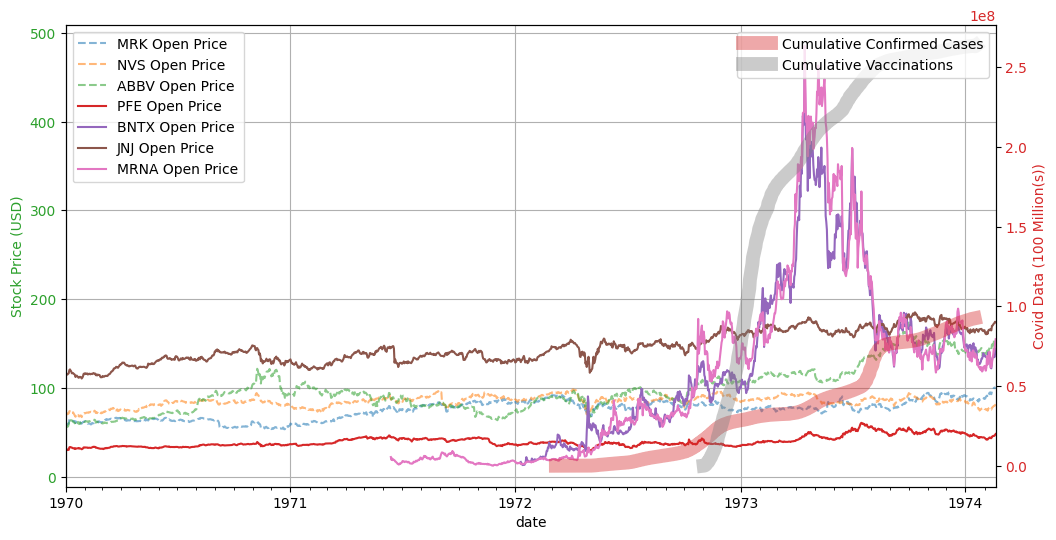

In [14]:
plot = dv.plot_data(merged_df)
plot.savefig(os.path.join(out_path, "trend_figure_pharma.png"), dpi = 600)